In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import cluster, datasets

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Método do cotovelo 

Plotar a curva do método do cotovelo pode ser uma abordagem útil para determinar o número ideal de clusters em seu conjunto de dados. O método do cotovelo é uma técnica comum usada para identificar o número ótimo de clusters observando a relação entre o número de clusters e a variabilidade dentro de cada cluster.

A ideia básica é calcular o valor da métrica de clusterização (por exemplo, a soma dos quadrados intra-cluster, WCSS) para diferentes valores de k (número de clusters) e plotá-los em um gráfico. Você então observa o ponto onde a curva começa a se "dobrar" ou "achatar" (daí o nome "cotovelo"), o que sugere que adicionar mais clusters não melhora muito a variabilidade dentro dos clusters.

In [2]:
# Carregar dados do Excel
dados = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name = "Sheet1")

In [3]:
# Selecionar as colunas relevantes - tabela com os valores de neurito CTL
X = dados[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]

In [4]:
# Vamos variar o número de clusters de 1 a 10
n_clusters_range = range(1, 11)
wcss = []

for n_clusters in n_clusters_range:
    # Definindo e ajustando o modelo de clusterização hierárquica
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    model.fit(X)
    
    # Calculando a métrica de clusterização (soma das distâncias quadradas)
    labels = model.labels_
    centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])  # Calculando o centro de cada cluster
    wcss.append(((X - centers[labels]) ** 2).sum())  # Calculando a soma das distâncias quadradas

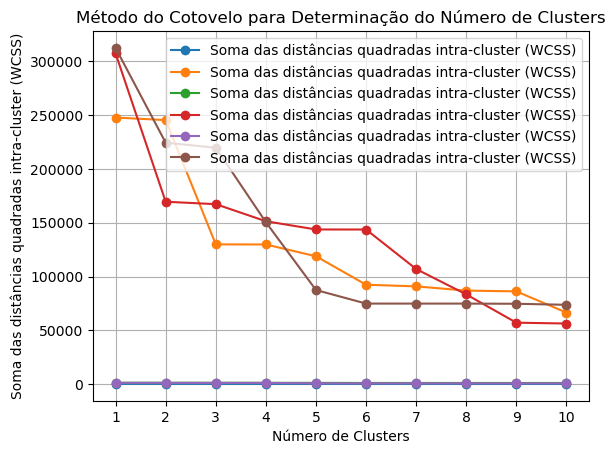

In [5]:
# Plotando a curva do método do cotovelo com legenda
plt.plot(n_clusters_range, wcss, marker='o', label='Soma das distâncias quadradas intra-cluster (WCSS)')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das distâncias quadradas intra-cluster (WCSS)')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.legend()
plt.show()

# Quantidade de Clusters definido - 3

In [6]:
# Carregar dados do Excel
dados = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name = "Sheet1", index_col=0)

# Selecionar as colunas relevantes
X = dados[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]

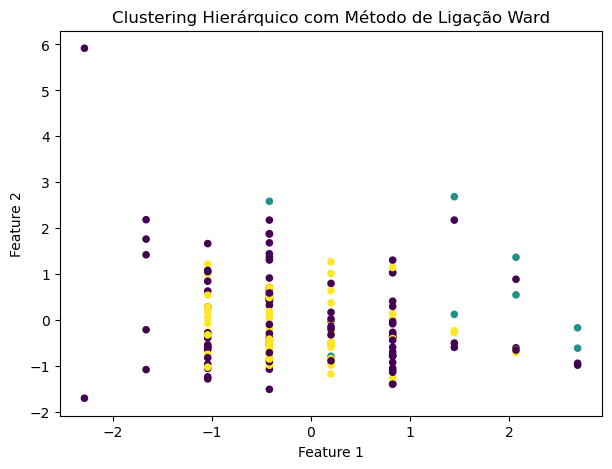

In [11]:
# Normalizar os dados
X = StandardScaler().fit_transform(X)

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X)

# Plotar os resultados do clustering
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=20)
plt.title('Clustering Hierárquico com Método de Ligação Ward')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Tentativa 2

Redução de dimensionalidade usando PCA para visualização - apliquei o PCA para reduzir a dimensionalidade dos dados para 2 componentes principais e, em seguida, apliquei o algoritmo de clustering hierárquico.

A análise de componentes principais (PCA) é uma técnica de redução de dimensionalidade que busca representar os dados em um espaço de menor dimensão, mantendo a maior parte da variabilidade original dos dados. Ao reduzir a dimensionalidade, o PCA projeta os dados em um novo conjunto de eixos, chamados de componentes principais, onde o primeiro componente principal captura a maior parte da variabilidade dos dados, o segundo componente principal captura a segunda maior parte da variabilidade e assim por diante.

Portanto, quando você realiza uma PCA com n_components=2, está solicitando que o algoritmo identifique os dois principais componentes que capturam a maior parte da variabilidade dos seus dados originais. Esses dois componentes principais são usados para representar os dados em um espaço bidimensional, o que facilita a visualização e interpretação dos padrões nos dados.

No contexto do seu problema, ao usar PCA com n_components=2, os "dois componentes principais" se referem aos dois eixos principais do novo espaço dimensional, nos quais os dados são projetados após a redução de dimensionalidade. Esses componentes podem ser interpretados como combinações lineares das características originais que melhor representam a variabilidade dos seus dados.

Ao interpretar o gráfico resultante, procure o ponto onde a curva começa a se achatar. Este ponto é frequentemente considerado como o número ideal de clusters para o seu conjunto de dados. No entanto, a interpretação do método do cotovelo pode ser subjetiva e depende do contexto do seu problema e da sua análise específica.

#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [12]:
# Carregar dados do Excel - CTL
dados1 = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name="Sheet1", index_col=0)

In [13]:
# Selecionar as colunas relevantes
X = dados1[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]

In [14]:
# Normalizar os dados
X = StandardScaler().fit_transform(X)

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

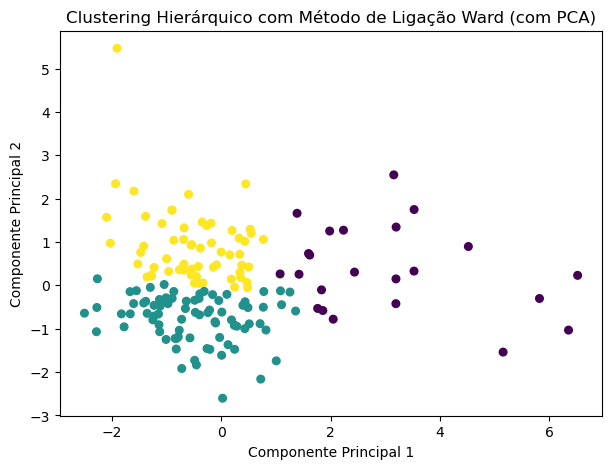

In [15]:
# Plotar os resultados do clustering
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Identificar os valores que pertencem a cada cluster
#clustered_data = {f'Cluster_{i}': X[y_pred == i] for i in range(3)}

# Criar um DataFrame com os valores de cada cluster
#clustered_df = pd.DataFrame(clustered_data)

# Salvar o DataFrame em um arquivo Excel
#clustered_df.to_excel('resultados_clusters.xlsx')

Tratamento

In [16]:
# Carregar dados do Excel
dados3 = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name="Sheet3", index_col=0)

# Selecionar as colunas relevantes
X = dados3[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]


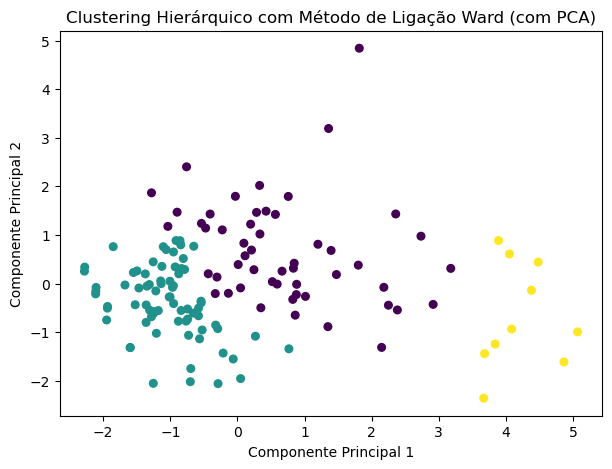

In [17]:
# Normalizar os dados
X = StandardScaler().fit_transform(X)

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

# Plotar os resultados do clustering
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Identificar os valores que pertencem a cada cluster
#clustered_data = {f'Cluster_{i}': X[y_pred == i] for i in range(3)}

# Criar um DataFrame com os valores de cada cluster
#clustered_df = pd.DataFrame(clustered_data)

# Salvar o DataFrame em um arquivo Excel
#clustered_df.to_excel('resultados_clusters.xlsx')

# Comparaçao entre controle e tratamento (veiculo e ATA)

In [18]:
# Carregar dados do Excel
dados = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name="Sheet2", index_col=0)

In [19]:
# Separar os dados de controle e tratamento
dados_controle = dados[dados['grupo'] == 'controle']
dados_tratamento = dados[dados['grupo'] == 'tratamento']

# Selecionar as colunas relevantes para controle
X_controle = dados_controle[['quant_primario', 'mean_primario', 
                             'quant_secundario', 'mean_secundario', 
                             'quant_terciario', 'mean_terciario']]

# Selecionar as colunas relevantes para tratamento
X_tratamento = dados_tratamento[['quant_primario', 'mean_primario', 
                                 'quant_secundario', 'mean_secundario', 
                                 'quant_terciario', 'mean_terciario']]

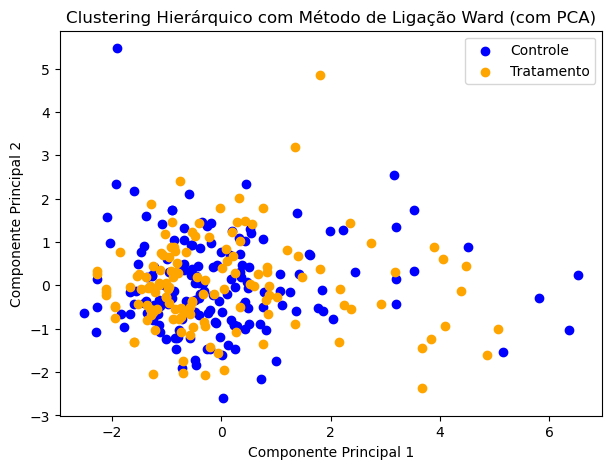

In [20]:
# Normalizar os dados para controle
X_controle = StandardScaler().fit_transform(X_controle)

# Normalizar os dados para tratamento
X_tratamento = StandardScaler().fit_transform(X_tratamento)

# Redução de dimensionalidade com PCA para controle
pca_controle = PCA(n_components=2)
X_pca_controle = pca_controle.fit_transform(X_controle)

# Redução de dimensionalidade com PCA para tratamento
pca_tratamento = PCA(n_components=2)
X_pca_tratamento = pca_tratamento.fit_transform(X_tratamento)

# Unir os dados reduzidos de controle e tratamento
X_pca = np.concatenate((X_pca_controle, X_pca_tratamento))

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

# Plotar os resultados do clustering para controle e tratamento
plt.figure(figsize=(7, 5))

# Plotar os pontos de controle em azul
plt.scatter(X_pca_controle[:, 0], X_pca_controle[:, 1], color='blue', label='Controle')

# Plotar os pontos de tratamento em laranja
plt.scatter(X_pca_tratamento[:, 0], X_pca_tratamento[:, 1], color='orange', label='Tratamento')

plt.title('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()
